### Load Packages

In [1]:
import pandas as pd
import spacy
import pytextrank
from string import punctuation
import collections

import numpy as np
import pandas as pd

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

downloading English language model from SpaCy
- conda activate [your environment]
- python –m spacy download en

In [3]:
# load a spaCy model
# attach PyTextRank to the spaCy pipeline
nlp = spacy.load("en_core_web_sm")
import spacy
nlp.add_pipe("textrank")

# read dataset
import pandas as pd
abstract = pd.read_csv("dataset_sorted.csv")

In [4]:
# apply spacy parser to text variable
# get keyword extracted by TextRank  
doc_nlp = [nlp(text) for text in abstract.abstract]

kewyord = []
for item in range(len(doc_nlp)):
    for letter in doc_nlp[item]._.phrases[:20]:
        kewyord.append(letter.text)


In [5]:
# clean punctuation and stopword
from wordcloud import WordCloud, STOPWORDS
from string import punctuation
kewyord_clean = [word for word in [word for word in kewyord if word not in STOPWORDS] if word not in punctuation]
num_words = collections.Counter(kewyord_clean)

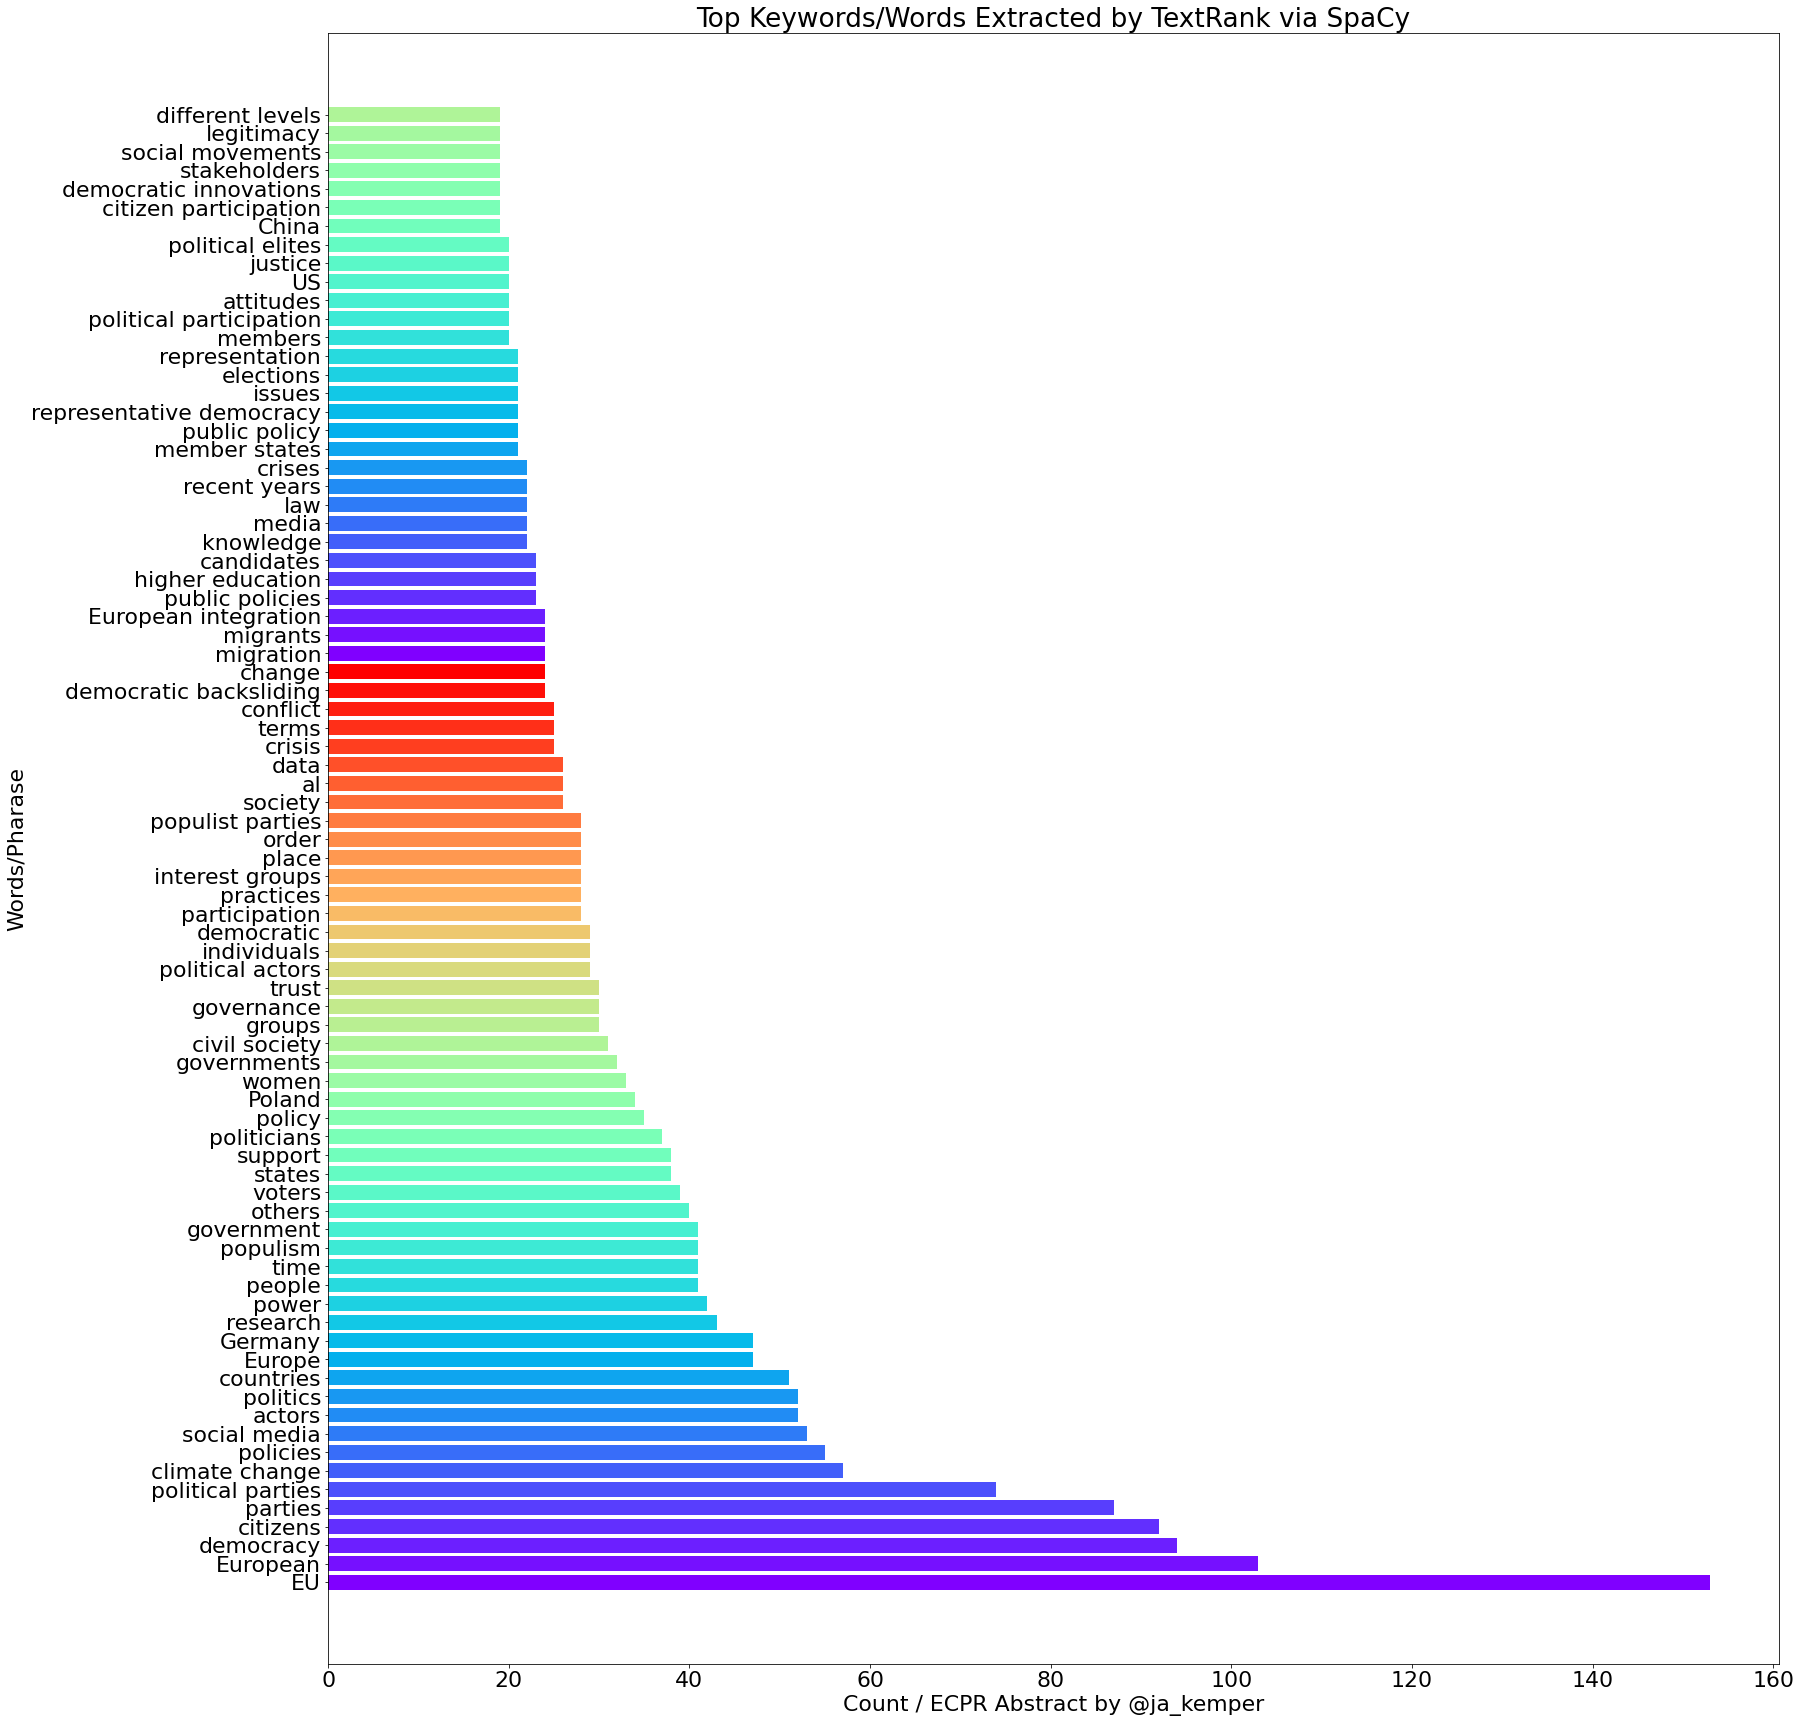

In [15]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

words = []
counts = []
for letter, count in num_words.most_common(80):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 50))
rcParams['figure.figsize'] = 26, 30
rcParams['font.size'] = '22'

plt.title('Top Keywords/Words Extracted by TextRank via SpaCy')
plt.xlabel('Count / ECPR ABSTRUCT done by @ja_kemper')
plt.ylabel('Words/Pharase')
plt.barh(words, counts, color=colors)
# plt.show()
plt.savefig('ecpr.png')